In [484]:
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

In [559]:
mag_flux = np.genfromtxt('PSP_FLD_L2_MAG_RTN_1MIN_145910.txt', skip_header=59, skip_footer=3)
density = np.genfromtxt('PSP_SWP_SPC_L3I_72861.txt', skip_header=76, skip_footer=3)

In [560]:
A = np.array(mag_flux)
B = np.array(density)

A_2 = A[:,1:]
B_2 = B[:,1:]

A_time_int1 = (1 / 24) * (1 / 60) * (1 / 60) * A_2[:,0]
B_time_int1 = (1 / 24) * (1 / 60) * (1 / 60) * B_2[:,0]

A_time_int2 = A_time_int1 - 323
B_time_int2 = B_time_int1 - 323

A_h = A_time_int2 * 24
B_h = B_time_int2 * 24

A_fix = np.column_stack([A_h, A_2[:,1:]])
B_fix = np.column_stack([B_h, B_2[:,1:]])

print(A_fix

In [561]:
# Values for interpolation
B_values = B_fix[:, 1]  #Interpolate values in 2nd col

# Indices for interpolation
x = np.linspace(0, len(B_values) - 1, len(A))

# Linear interpolation
B_rs = np.interp(x, np.arange(len(B_values)), B_values)

In [607]:
m_p = (1.67 * 10**-27 * u.kg) # proton mass
N = (A_fix[:,1] * 10**-9)/ (np.sqrt(4 * np.pi * m_p * B_rs * 10**5)) #convert nT to T (numerator) and cm^-3 to m^-3 then km (denominator)

In [608]:
x1 = A_h
y1 = np.abs(N)

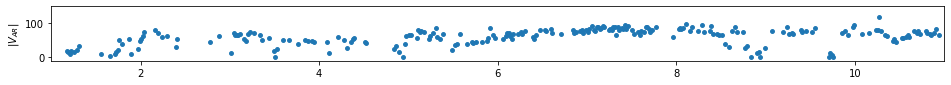

In [609]:
plt.figure(figsize=(16,1))
plt.xlim(1, 11)
plt.ylim(-10, 150)
plt.ylabel("$|V_{AR}|$")

plt.scatter(x1, y1, s=15)
plt.show()

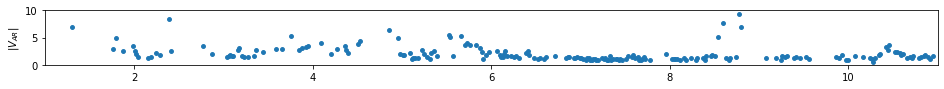

In [621]:
x1 = A_h
y2 =(.58 * 150 / np.abs(N))**2
plt.figure(figsize=(16,1))
plt.xlim(1, 11)
plt.ylim(0, 10)
plt.ylabel("$|V_{AR}|$")

plt.scatter(x1, y2, s=15)
plt.show()